### 三種品種：beagle, redbone, lbizan_hound
<p>trian data：150（各50張圖片）<p>
<p>test data：75（各25張圖片）<p>

## 步驟:
##### 統一圖片資料

1. 圖片轉為相同大小
2. 檢查images與labels

##### 資料預處理

3. images預處理
4. labels預處理（data用.csv）

##### 建立模型

5. 建立模型（CNN）
6. 進行訓練
7. 評估模型準確率
8. 進行預測
9. 查看預測機率
10. 顯示混淆矩陣


# 1. 先將圖片轉為相同大小

In [1]:
#[ 1. 圖片轉為相同大小 ]

# Step1. 批量轉換圖片大小並儲存

import os
from PIL import Image

DATA_DIR = "dogCNNSL/ORIGTrainImg/" # 資料夾路徑
count = 0

# 轉換ORIGTrainImg
for filename in os.listdir(DATA_DIR):
    if( filename==".DS_Store" ):
        pass
    else:
        print("Loading: %s" % filename)
        im = Image.open(DATA_DIR+filename)
    
        width = 100
        height = 100
        reim = im.resize((width, height))
        saveName = "dogCNNSL/trainImg/"+str(count)+".jpg"
        reim.save(saveName)
        print(str(count)+".jpg", "Resize and Save Complete")
        count = count+1

Loading: n02088364_1128.jpg
0.jpg Resize and Save Complete
Loading: n02088364_129.jpg
1.jpg Resize and Save Complete
Loading: n02088364_1384.jpg
2.jpg Resize and Save Complete
Loading: n02088364_1507.jpg
3.jpg Resize and Save Complete
Loading: n02088364_161.jpg
4.jpg Resize and Save Complete
Loading: n02088364_2000.jpg
5.jpg Resize and Save Complete
Loading: n02088364_2019.jpg
6.jpg Resize and Save Complete
Loading: n02088364_2106.jpg
7.jpg Resize and Save Complete
Loading: n02088364_2143.jpg
8.jpg Resize and Save Complete
Loading: n02088364_2360.jpg
9.jpg Resize and Save Complete
Loading: n02088364_2415.jpg
10.jpg Resize and Save Complete
Loading: n02088364_2499.jpg
11.jpg Resize and Save Complete
Loading: n02088364_2502.jpg
12.jpg Resize and Save Complete
Loading: n02088364_2566.jpg
13.jpg Resize and Save Complete
Loading: n02088364_2572.jpg
14.jpg Resize and Save Complete
Loading: n02088364_2652.jpg
15.jpg Resize and Save Complete
Loading: n02088364_2661.jpg
16.jpg Resize and Save C

142.jpg Resize and Save Complete
Loading: n02091244_822.jpg
143.jpg Resize and Save Complete
Loading: n02091244_85.jpg
144.jpg Resize and Save Complete
Loading: n02091244_86.jpg
145.jpg Resize and Save Complete
Loading: n02091244_873.jpg
146.jpg Resize and Save Complete
Loading: n02091244_879.jpg
147.jpg Resize and Save Complete
Loading: n02091244_939.jpg
148.jpg Resize and Save Complete
Loading: n02091244_966.jpg
149.jpg Resize and Save Complete


In [2]:
DATA_DIR = "dogCNNSL/ORIGTestImg/" # 資料夾路徑
count = 0

# 轉換ORIGTestImg
for filename in os.listdir(DATA_DIR):
    if( filename==".DS_Store" ):
        pass
    else:
        print("Loading: %s" % filename)
        im = Image.open(DATA_DIR+filename)
    
        width = 100
        height = 100
        reim = im.resize((width, height))
        saveName = "dogCNNSL/testImg/"+str(count)+".jpg"
        reim.save(saveName)
        print(str(count)+".jpg", "Resize and Save Complete")
        count = count+1

Loading: n02088364_16635.jpg
0.jpg Resize and Save Complete
Loading: n02088364_16689.jpg
1.jpg Resize and Save Complete
Loading: n02088364_16695.jpg
2.jpg Resize and Save Complete
Loading: n02088364_16704.jpg
3.jpg Resize and Save Complete
Loading: n02088364_16721.jpg
4.jpg Resize and Save Complete
Loading: n02088364_16791.jpg
5.jpg Resize and Save Complete
Loading: n02088364_16881.jpg
6.jpg Resize and Save Complete
Loading: n02088364_16985.jpg
7.jpg Resize and Save Complete
Loading: n02088364_17167.jpg
8.jpg Resize and Save Complete
Loading: n02088364_17170.jpg
9.jpg Resize and Save Complete
Loading: n02088364_17258.jpg
10.jpg Resize and Save Complete
Loading: n02088364_17294.jpg
11.jpg Resize and Save Complete
Loading: n02088364_17314.jpg
12.jpg Resize and Save Complete
Loading: n02088364_17406.jpg
13.jpg Resize and Save Complete
Loading: n02088364_17473.jpg
14.jpg Resize and Save Complete
Loading: n02088364_17474.jpg
15.jpg Resize and Save Complete
Loading: n02088364_17479.jpg
16.jp

# 2. 檢查images與labels

In [3]:
#[ 2. 查多筆images與labels ]

# Step1. 定義label_dict字典

label_dict = {0:"beagle", 1:"redbone", 2:"lbizan_hound"}

In [4]:
# Step2. plot_images_labels_prediction()函數

import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25:
        num=25
        
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i)+', '+label_dict[labels[i]]
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        
    plt.show()

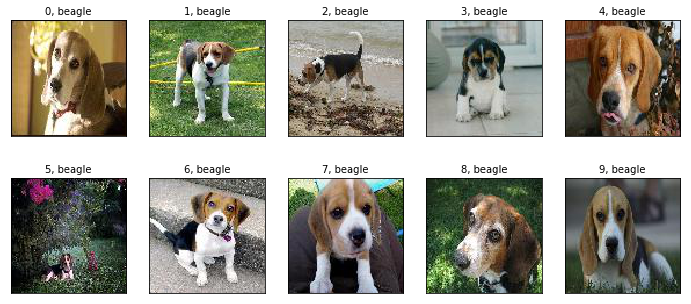

In [5]:
# Step3. 查看訓練資料前10筆資料

import csv

DATA_DIR = "dogCNNSL/trainImg/" # 圖片資料夾路徑
images = []
labels = []

with open('dogCNNSL/trainData.csv', mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        im = Image.open(DATA_DIR+row[0])
        images.append(im)
        
        labels.append( int(row[1]) )
        
plot_images_labels_prediction(images, labels, [], 0)

# 3. images預處理

In [6]:
#[ 3. 將images進行預處理 ]

# 匯入相關模組
import numpy as np
np.random.seed(3)

# Step1. 整理data.csv後，讀取並存成list
# train資料

import csv
from keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image

DATA_DIR = "dogCNNSL/trainImg/" # 圖片資料夾路徑
train_img = []
train_label = []

with open('dogCNNSL/trainData.csv', mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        # images
        im = Image.open(DATA_DIR+row[0])
        arr_img = img_to_array(im)
        train_img.append(arr_img)
        print(row[0], 'has already in list!')
        
        # label
        train_label.append( int(row[1]) )
        print(row[1], 'has already in list!')

Using TensorFlow backend.


0.jpg has already in list!
0 has already in list!
1.jpg has already in list!
0 has already in list!
2.jpg has already in list!
0 has already in list!
3.jpg has already in list!
0 has already in list!
4.jpg has already in list!
0 has already in list!
5.jpg has already in list!
0 has already in list!
6.jpg has already in list!
0 has already in list!
7.jpg has already in list!
0 has already in list!
8.jpg has already in list!
0 has already in list!
9.jpg has already in list!
0 has already in list!
10.jpg has already in list!
0 has already in list!
11.jpg has already in list!
0 has already in list!
12.jpg has already in list!
0 has already in list!
13.jpg has already in list!
0 has already in list!
14.jpg has already in list!
0 has already in list!
15.jpg has already in list!
0 has already in list!
16.jpg has already in list!
0 has already in list!
17.jpg has already in list!
0 has already in list!
18.jpg has already in list!
0 has already in list!
19.jpg has already in list!
0 has already

In [7]:
# test資料
DATA_DIR = "dogCNNSL/testImg/" # 圖片資料夾路徑
test_img = []
test_label = []

with open('dogCNNSL/testData.csv', mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        # images
        im = Image.open(DATA_DIR+row[0])
        arr_img = img_to_array(im)
        test_img.append(arr_img)
        print(row[0], 'has already in list!')
        
        # label
        test_label.append( int(row[1]) )
        print(row[1], 'has already in list!')

0.jpg has already in list!
0 has already in list!
1.jpg has already in list!
0 has already in list!
2.jpg has already in list!
0 has already in list!
3.jpg has already in list!
0 has already in list!
4.jpg has already in list!
0 has already in list!
5.jpg has already in list!
0 has already in list!
6.jpg has already in list!
0 has already in list!
7.jpg has already in list!
0 has already in list!
8.jpg has already in list!
0 has already in list!
9.jpg has already in list!
0 has already in list!
10.jpg has already in list!
0 has already in list!
11.jpg has already in list!
0 has already in list!
12.jpg has already in list!
0 has already in list!
13.jpg has already in list!
0 has already in list!
14.jpg has already in list!
0 has already in list!
15.jpg has already in list!
0 has already in list!
16.jpg has already in list!
0 has already in list!
17.jpg has already in list!
0 has already in list!
18.jpg has already in list!
0 has already in list!
19.jpg has already in list!
0 has already

In [8]:
# Step2. 查看train_img及train_label情況

print(train_img[0].shape)
print(train_label[0])

(100, 100, 3)
0


In [9]:
# Step3. 將list轉為np.array

train_img = np.array(train_img)
train_label = np.array(train_label)
test_img = np.array(test_img)
test_label = np.array(test_label)

In [10]:
# Step4. 將照片影像image的數字標準化

train_img_normalize = train_img.astype('float32')/255.0
test_img_normalize = test_img.astype('float32')/255.0

In [11]:
# Step5. 查看照片影像image標準化後的結果
train_img_normalize[0][0][0]

array([ 0.08627451,  0.        ,  0.        ], dtype=float32)

# 4. labels預處理

In [12]:
#[ 4. 將labels進行預處理 ]#

# Step1. 查看label的原本的shape形狀
train_label.shape

(150,)

In [13]:
# Step2. 查看前5筆資料
train_label[:5]

array([0, 0, 0, 0, 0])

In [14]:
# Step3. 將label標籤欄位轉換為Onehot encoding
from keras.utils import np_utils
train_label_OneHot = np_utils.to_categorical(train_label)
test_label_OneHot = np_utils.to_categorical(test_label)

In [15]:
# Step4. One-hot encoding轉換之後的label標籤欄位
print(train_label_OneHot.shape)
print(test_label_OneHot.shape)

(150, 3)
(75, 3)


In [16]:
# Step5. 查看轉換為One-hot encoding之後的結果
train_label_OneHot[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

#  5. 建立模型

In [17]:
#[ 5. 建立模型 ]

# Step1. 匯入所需模組
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

In [18]:
# Step2. 建立keras的Sequential模型
model = Sequential()

In [19]:
# Step3. 建立卷積層1與池化層1
# 建立卷積層1
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 input_shape=(100, 100, 3),
                 padding='same',
                 activation='relu'))

In [20]:
# 加入Dropout
model.add(Dropout(rate=0.25))

In [21]:
# 建立池化層1
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
# Step4. 建立卷積層2與池化層2
# 建立卷積層2
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

In [23]:
# 加入Dropout
model.add(Dropout(0.25))

In [24]:
# 建立池化層2
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
# Step5. 建立神經網路(平坦層、隱藏層、輸出層)
# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [26]:
# 建立隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [27]:
# 建立輸出層
model.add(Dense(3, activation='softmax'))

In [28]:
# Step6. 查看模型的摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)             0         
__________

# 6. 進行訓練

In [29]:
#[ 6. 進行訓練 ]

# Step1. 定義訓練方式
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [30]:
# Step2. 開始訓練
train_history = model.fit(x = train_img_normalize,
                          y = train_label_OneHot, validation_split=0.2,
                          epochs=20, batch_size=25, shuffle=True, verbose=2)

Train on 120 samples, validate on 30 samples
Epoch 1/20
11s - loss: 7.8670 - acc: 0.3750 - val_loss: 10.3335 - val_acc: 0.0000e+00
Epoch 2/20
7s - loss: 6.1724 - acc: 0.3667 - val_loss: 1.8035 - val_acc: 0.0000e+00
Epoch 3/20
7s - loss: 1.0212 - acc: 0.4833 - val_loss: 1.5805 - val_acc: 0.0000e+00
Epoch 4/20
6s - loss: 0.8916 - acc: 0.6083 - val_loss: 1.4599 - val_acc: 0.0000e+00
Epoch 5/20
7s - loss: 0.7360 - acc: 0.7000 - val_loss: 1.8681 - val_acc: 0.0000e+00
Epoch 6/20
7s - loss: 0.5999 - acc: 0.7583 - val_loss: 0.9713 - val_acc: 0.4333
Epoch 7/20
6s - loss: 0.3939 - acc: 0.8667 - val_loss: 2.4266 - val_acc: 0.0000e+00
Epoch 8/20
6s - loss: 0.3008 - acc: 0.8833 - val_loss: 1.2837 - val_acc: 0.2000
Epoch 9/20
6s - loss: 0.2271 - acc: 0.9167 - val_loss: 1.8797 - val_acc: 0.0667
Epoch 10/20
7s - loss: 0.1049 - acc: 0.9917 - val_loss: 1.3788 - val_acc: 0.3667
Epoch 11/20
7s - loss: 0.0776 - acc: 0.9750 - val_loss: 2.1485 - val_acc: 0.0667
Epoch 12/20
8s - loss: 0.0425 - acc: 1.0000 - v

In [31]:
# Step3. 建立show_train_history顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

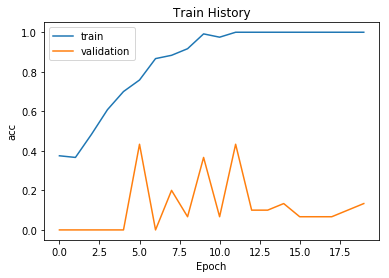

In [32]:
# Step4. 畫出accuracy執行結果
show_train_history(train_history, 'acc', 'val_acc')

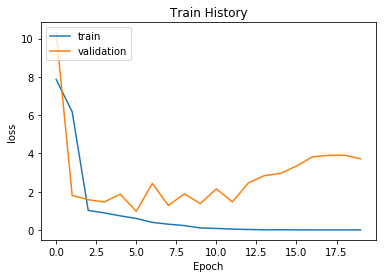

In [33]:
# Step5. 畫出loss誤差執行結果
show_train_history(train_history, 'loss', 'val_loss')

# 7. 評估模型準確率

In [34]:
#[ 7. 評估模型準確率 ]#

# Step1. 評估模型準確率
scores = model.evaluate(test_img_normalize, test_label_OneHot, verbose=0)
scores[1]

0.44000000079472862

# 8. 進行預測

In [35]:
#[ 8. 進行預測 ]#

# Step1. 執行預測
prediction = model.predict_classes(test_img_normalize)

75/75 [==============================] - 0s     


In [36]:
# Step2. 預測結果
prediction[:10]

array([0, 1, 1, 0, 1, 2, 0, 2, 2, 1])

In [37]:
# Step3. 定義label_dict字典
label_dict = {0:"beagle", 1:"redbone", 2:"lbizan_hound"}

In [38]:
# Step4. 建立plot_images_labels_prediction()函數
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25:
        num=25
        
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i)+', '+label_dict[labels[i]]
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        
    plt.show()

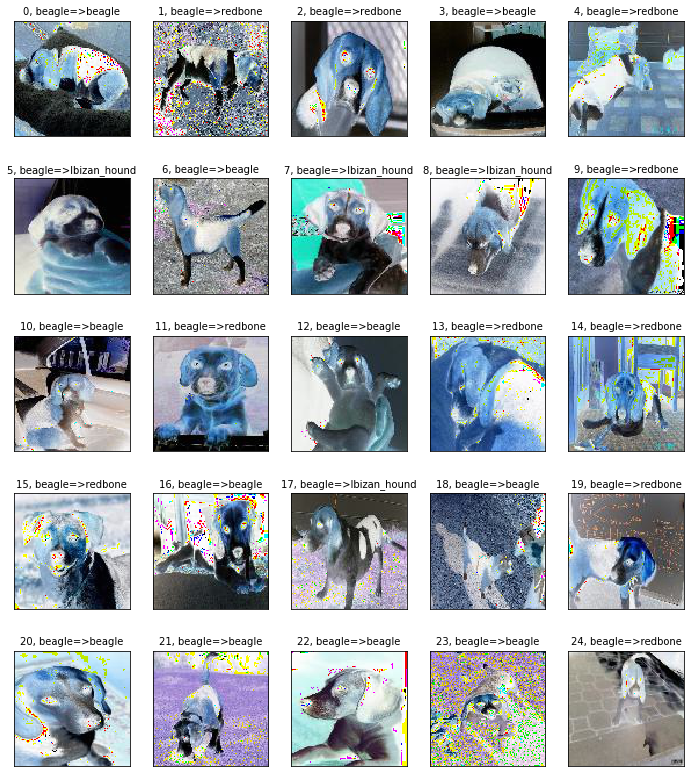

In [39]:
# Step5. 顯示前30筆預測結果
plot_images_labels_prediction(test_img, test_label, prediction, 0, 30)

# 9. 查看預測機率

In [40]:
#[ 9. 查看預測機率 ]#

# Step1. 使用測試資料進行測試
Predicted_Probability = model.predict(test_img_normalize)

In [41]:
# Step2. 建立show_Predicted_Probability函數
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i]],
          'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(test_img[i], (100, 100, 3)))
    plt.show()
    for j in range(3):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: beagle predict: beagle


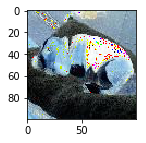

beagle Probability:0.861437440
redbone Probability:0.018652696
lbizan_hound Probability:0.119909927


In [42]:
# Step3. 查看第0筆資料預測的機率
show_Predicted_Probability(test_label, prediction, test_img, Predicted_Probability, 0)

label: beagle predict: beagle


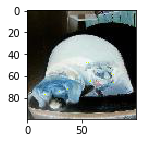

beagle Probability:0.587227464
redbone Probability:0.412518263
lbizan_hound Probability:0.000254289


In [43]:
# Step3. 查看第3筆資料預測的機率
show_Predicted_Probability(test_label, prediction, test_img, Predicted_Probability, 3)

# 10. 顯示混淆矩陣

In [44]:
#[ 10. 顯示混淆矩陣 ]#

# Step1. 查看prediction預測結果的形狀
prediction.shape

(75,)

In [45]:
# Step2. 查看y_label_test真實值的shape形狀
test_label.shape

(75,)

In [46]:
# Step3. 使用pandas crosstab建立混淆矩陣
import pandas as pd
print(label_dict)
pd.crosstab(test_label.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

{0: 'beagle', 1: 'redbone', 2: 'lbizan_hound'}


predict,0,1,2
label,,,
0,11,10,4
1,6,19,0
2,8,14,3
